In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [2]:
qbs = pd.read_csv('../Capstone_csv_file/qbs_long_salary_17-18')

In [3]:
qbs.dtypes

NAME          object
LONG           int64
LONG_rank    float64
salary         int64
dtype: object

In [4]:
qbs.head()

,NAME,LONG,LONG_rank,salary
0,Ben Roethlisberger,97,1.0,21850000
1,Jared Goff,94,2.0,6984418
2,Matt Ryan,88,3.0,20750000
3,Derek Carr,87,4.0,25000000
4,Alex Smith,79,8.0,17000000


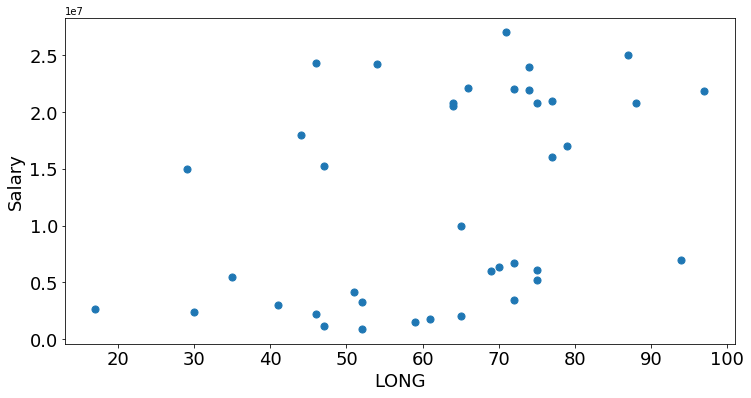

In [5]:
ax = qbs.plot(kind="scatter", x = 'LONG',  y = 'salary', figsize = (12,6), s = 50)
plt.xlabel('LONG', fontsize=18)
plt.ylabel("Salary", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)

In [6]:
ss = StandardScaler()
X = ss.fit_transform(qbs.loc[:, ['LONG', 'salary']])

In [7]:
X.mean(axis = 0)

array([-2.04964251e-16, -2.27738056e-17])

In [8]:
X.std(axis = 0)

array([1., 1.])

In [9]:
km = KMeans(n_clusters = 5, random_state = 27)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=27, tol=0.0001, verbose=0)

In [10]:
km.cluster_centers_

array([[-1.02269447,  0.79759832],
       [ 0.59050978, -0.7211662 ],
       [ 0.76136639,  1.03410115],
       [-0.62634688, -1.12722715],
       [-1.94982335, -0.98569826]])

In [11]:
km.predict(X)

array([2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2,
       2, 3, 3, 0, 3, 3, 3, 0, 3, 0, 3, 0, 3, 4, 4, 0, 4], dtype=int32)

In [12]:
qbs['clusters'] = km.labels_
qbs.head()

,NAME,LONG,LONG_rank,salary,clusters
0,Ben Roethlisberger,97,1.0,21850000,2
1,Jared Goff,94,2.0,6984418,1
2,Matt Ryan,88,3.0,20750000,2
3,Derek Carr,87,4.0,25000000,2
4,Alex Smith,79,8.0,17000000,2


In [13]:
ss.inverse_transform(km.cluster_centers_)

array([[4.40000000e+01, 1.93700000e+07],
       [7.30000000e+01, 5.85245433e+06],
       [7.60714286e+01, 2.14749595e+07],
       [5.11250000e+01, 2.23836713e+06],
       [2.73333333e+01, 3.49802467e+06]])

In [14]:
qbs.groupby('clusters')[['LONG', 'salary']].mean()

,LONG,salary
clusters,,
0,44.000000,1.937000e+07
1,73.000000,5.852454e+06
2,76.071429,2.147496e+07
3,51.125000,2.238367e+06
4,27.333333,3.498025e+06


In [15]:
centroids = qbs.groupby('clusters')[['LONG', 'salary']].mean()

<Figure size 504x504 with 0 Axes>

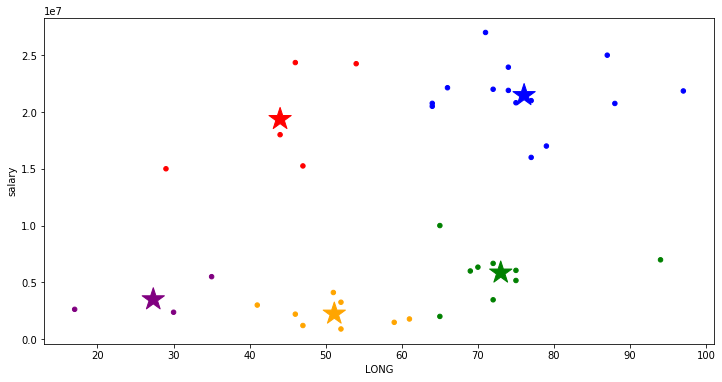

In [16]:
plt.figure(figsize = (7,7));

colors = ['red', 'green', 'blue', 'orange', 'purple']
qbs['color'] = qbs['clusters'].map(lambda p: colors[p])

ax = qbs.plot(    
    kind = 'scatter', 
    x = 'LONG', y = 'salary',
    figsize = (12,6),
    c = qbs['color']
);

centroids.plot(
    kind = 'scatter', 
    x = 'LONG', y = 'salary', 
    marker = '*', c = colors, s = 550,
    ax = ax
);

In [17]:
km.inertia_

11.060158659282024

In [18]:
silhouette_score(X, km.labels_)

0.4863316078235597